In [185]:
## Import Libraries and Load Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing dataset
#!pip install ucimlrepo



In [186]:
# fetch dataset
from ucimlrepo import fetch_ucirepo
bank_marketing = fetch_ucirepo(id=222)

In [187]:
## Head of dataset
# data (as pandas dataframes)
X = bank_marketing.data.features
result = bank_marketing.data.targets


# Display the head of the features DataFrame
print("Head of Features (X):\n", X.head())

# Display the head of the targets DataFrame
result.rename(columns={'y': 'result'}, inplace=True)
print("\nHead of Targets (y):\n", result.head())



Head of Features (X):
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  

Head of Targets (y):
   result
0     no
1     no
2     no
3     no
4 

<ipython-input-187-507da2ec88bf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.rename(columns={'y': 'result'}, inplace=True)


In [188]:
## Checking for missing values
missing_x = X.isnull().sum()
missing_y = result.isnull().sum()

print("Missing values in X is:\n",missing_x)
print("\nMissing values in y is:\n",missing_y)

Missing values in X is:
 age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

Missing values in y is:
 result    0
dtype: int64


In [189]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [190]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   result  45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


From visualizing the Missing values we can observe that there are a lot of missing values in the poutcome column. We would drop the poutcome column because as we can see, almost the whole column is "NaN". However, for "job", "educaton", and "contact", we will be replacing these missing values with mean because the number of missing values is less. We cannot drop them as they may be important

<Axes: >

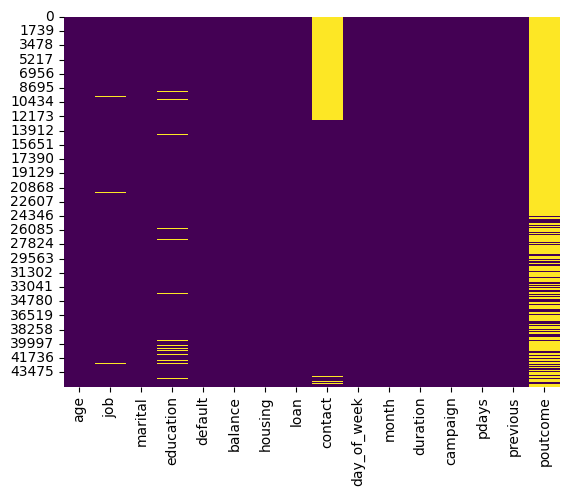

In [191]:
#Visualizing the Missing Values
sns.heatmap(X.isnull(),cbar=False,cmap='viridis')


In [192]:
##Replacing the Missing Values

#Delete
X.drop(columns=["poutcome", "contact"], inplace= True)
X.head()




<ipython-input-192-5449d8069110>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=["poutcome", "contact"], inplace= True)


,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,92,1,-1,0
4,33,NaN,single,NaN,no,1,no,no,5,may,198,1,-1,0


In [193]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame
# Select columns to impute
columns_to_impute = ["job", "education"]

# Create a SimpleImputer with the most frequent value for missing entries
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for the selected columns
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

# Check the head of the DataFrame to verify the changes
print(X.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

   day_of_week month  duration  campaign  pdays  previous  
0            5   may       261         1     -1         0  
1            5   may       151         1     -1         0  
2            5   may        76         1     -1         0  
3            5   may        92         1     -1         0  
4            5   may       198         1     -1         0  


<ipython-input-193-5bcf8d91c115>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])


#Analysis


Checking correlation between different variables

<ipython-input-194-17431085f0c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(),cbar=True,annot=True,cmap='Blues')


<Axes: >

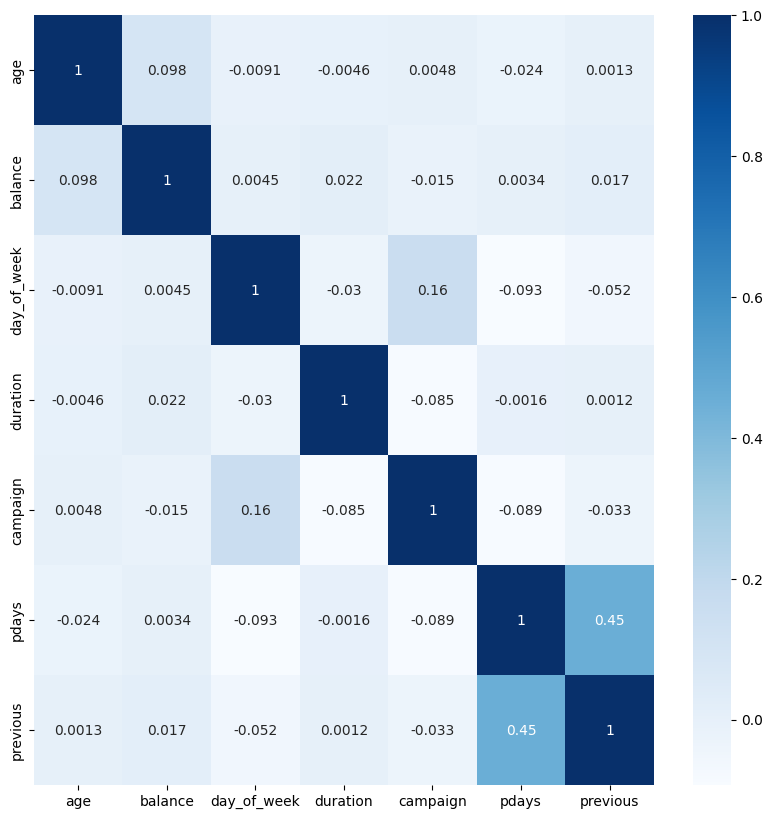

In [194]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),cbar=True,annot=True,cmap='Blues')

Analyzing Target Variable (y):



*   Does previous term deposit subscription correlate to future subscription?
*   Does marital status correlate to propensity to subscribe?





<Figure size 1000x600 with 0 Axes>

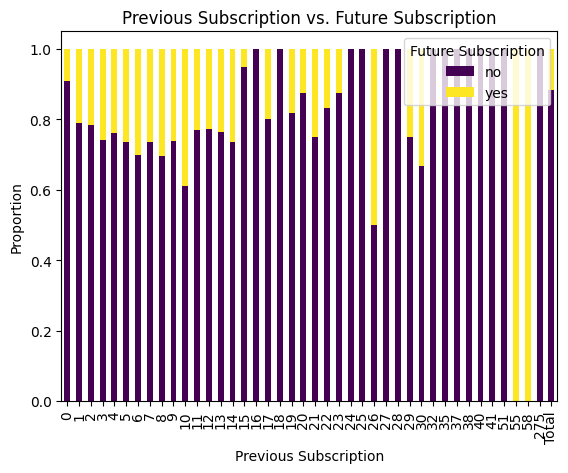

In [195]:
import matplotlib.pyplot as plt

# Create a cross-tabulation of previous vs. y
cross_tab = pd.crosstab(X['previous'], result['result'], margins=True, margins_name='Total')

# Calculate proportions
proportions = cross_tab.div(cross_tab['Total'], axis=0)

# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
proportions[['no', 'yes']].plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Previous Subscription vs. Future Subscription')
plt.xlabel('Previous Subscription')
plt.ylabel('Proportion')
plt.legend(title='Future Subscription', loc='upper right')
plt.show()



<Figure size 1000x600 with 0 Axes>

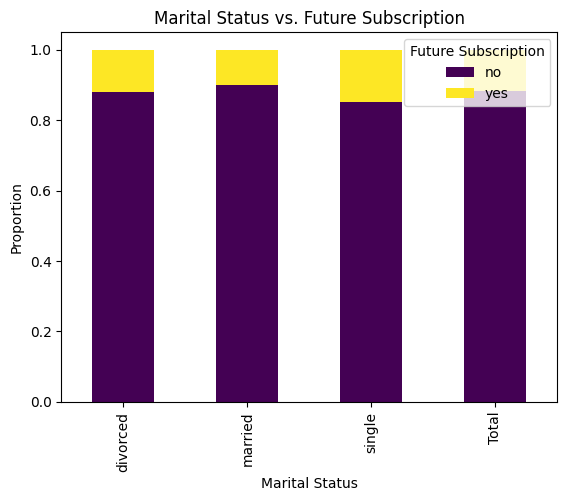

In [196]:
# Does marital status correlate to propensity to subscribe?

# Create a cross-tabulation of marital vs. y
cross_tab_marital = pd.crosstab(X['marital'], result['result'], margins=True, margins_name='Total')

# Calculate proportions
proportions_marital = cross_tab_marital.div(cross_tab_marital['Total'], axis=0)

# Plot a stacked bar chart for marital vs. y
plt.figure(figsize=(10, 6))
proportions_marital[['no', 'yes']].plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Marital Status vs. Future Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.legend(title='Future Subscription', loc='upper right')
plt.show()

Marketing Campaign Analysis:

*   Are more recent contacts more likely to lead to subscription? Analyze by month and duration.
*   Is there an ideal number of contacts before outcome saturates? Check campaign totals.


In [198]:
df = pd.concat([X, result], axis=1)

1. Are more recent contacts more likely to lead to subscription? Analyze by month and duration.

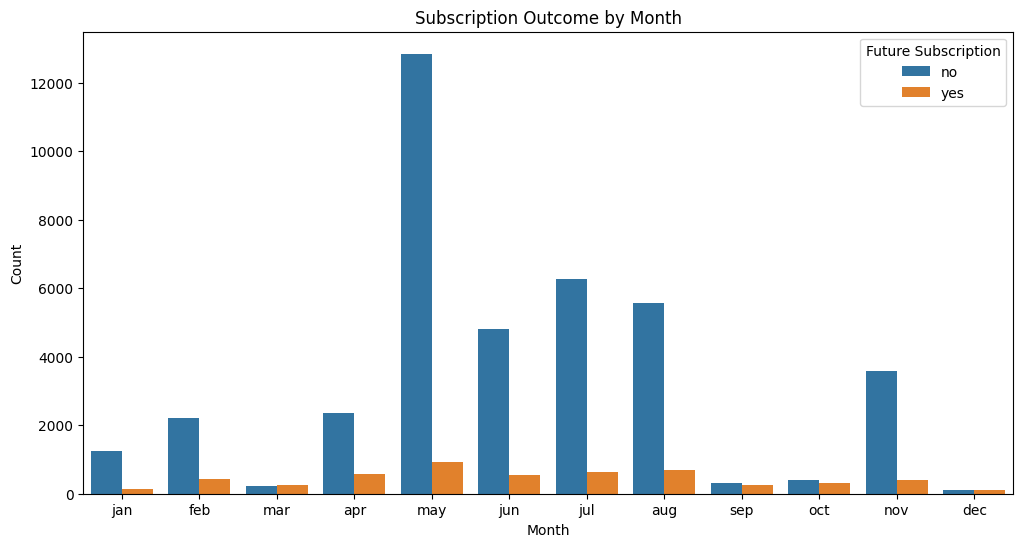

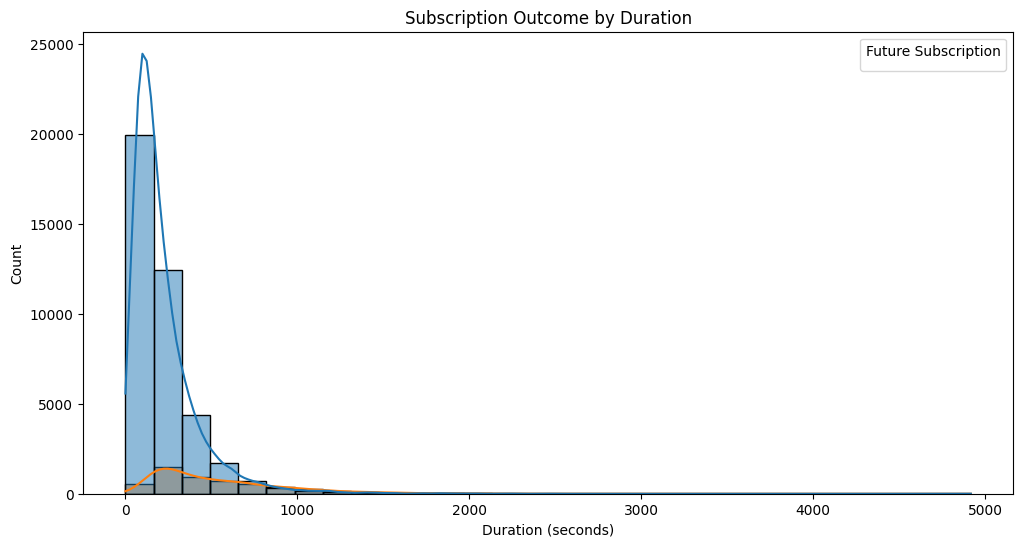

In [201]:
# Plotting the relationship between month and subscription outcome
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='result', data=df, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Subscription Outcome by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Future Subscription', loc='upper right')
plt.show()

# Plotting the relationship between duration and subscription outcome
plt.figure(figsize=(12, 6))
sns.histplot(x='duration', hue='result', data=df, bins=30, kde=True)
plt.title('Subscription Outcome by Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.legend(title='Future Subscription', loc='upper right')
plt.show()

2. Is there an ideal number of contacts before the outcome saturates? Check campaign totals.

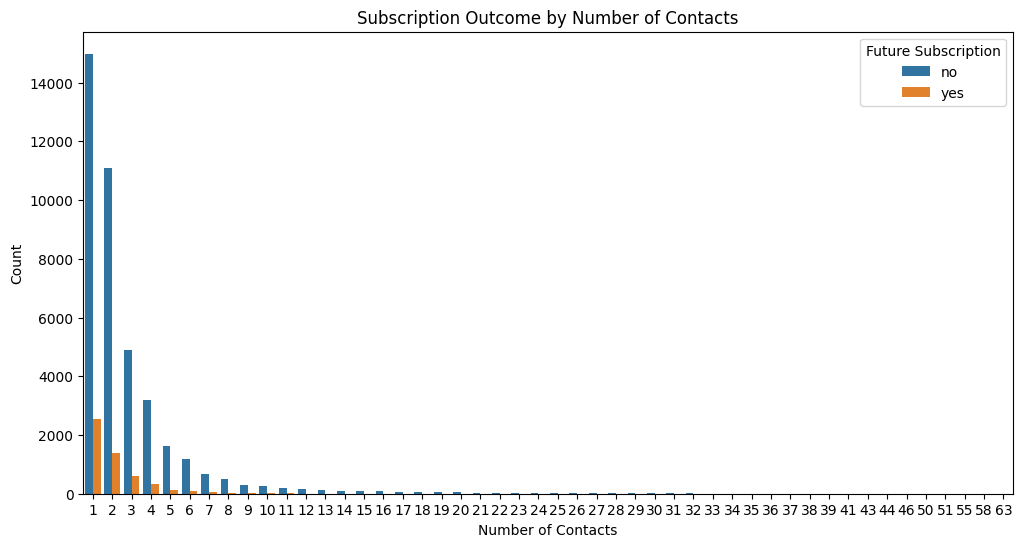

In [203]:
# Plotting the relationship between the number of contacts and subscription outcome
plt.figure(figsize=(12, 6))
sns.countplot(x='campaign', hue='result', data=df)
plt.title('Subscription Outcome by Number of Contacts')
plt.xlabel('Number of Contacts')
plt.ylabel('Count')
plt.legend(title='Future Subscription', loc='upper right')
plt.show()

Client Attribute Analysis:



* Does age correlate to likelihood of subscribing to term deposit? Scatter plots.
* Do different education levels have significantly different subscription rates?
* Do loan, housing, or defaults associate to differences in client response to marketing?



1. Does age correlate to the likelihood of subscribing to a term deposit? Scatter plot.

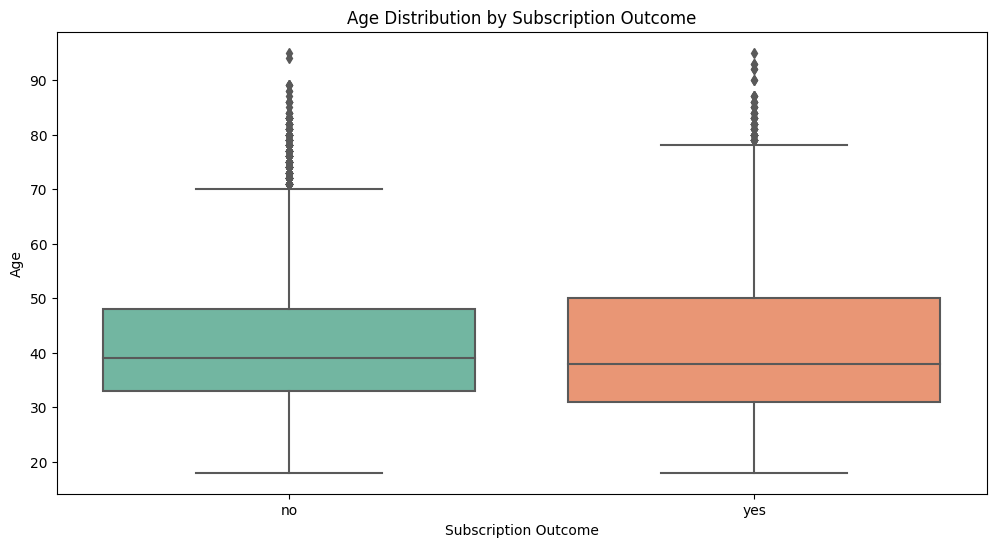

In [215]:

# Box plot for age and subscription outcome
plt.figure(figsize=(12, 6))
sns.boxplot(x='result', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Subscription Outcome')
plt.xlabel('Subscription Outcome')
plt.ylabel('Age')
plt.show()


2. Do different education levels have significantly different subscription rates?


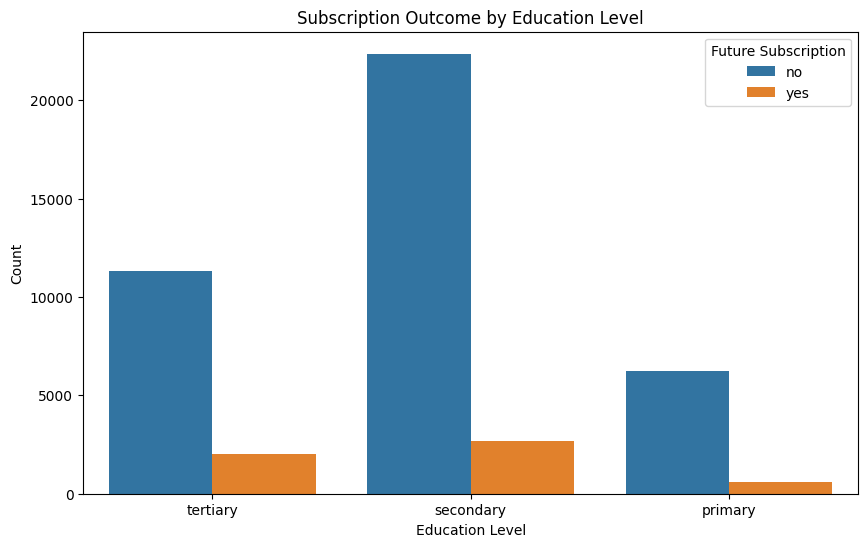

In [210]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='result', data=df)
plt.title('Subscription Outcome by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Future Subscription', loc='upper right')
plt.show()

3. Do loan, housing, or defaults associate with differences in client response to marketing?

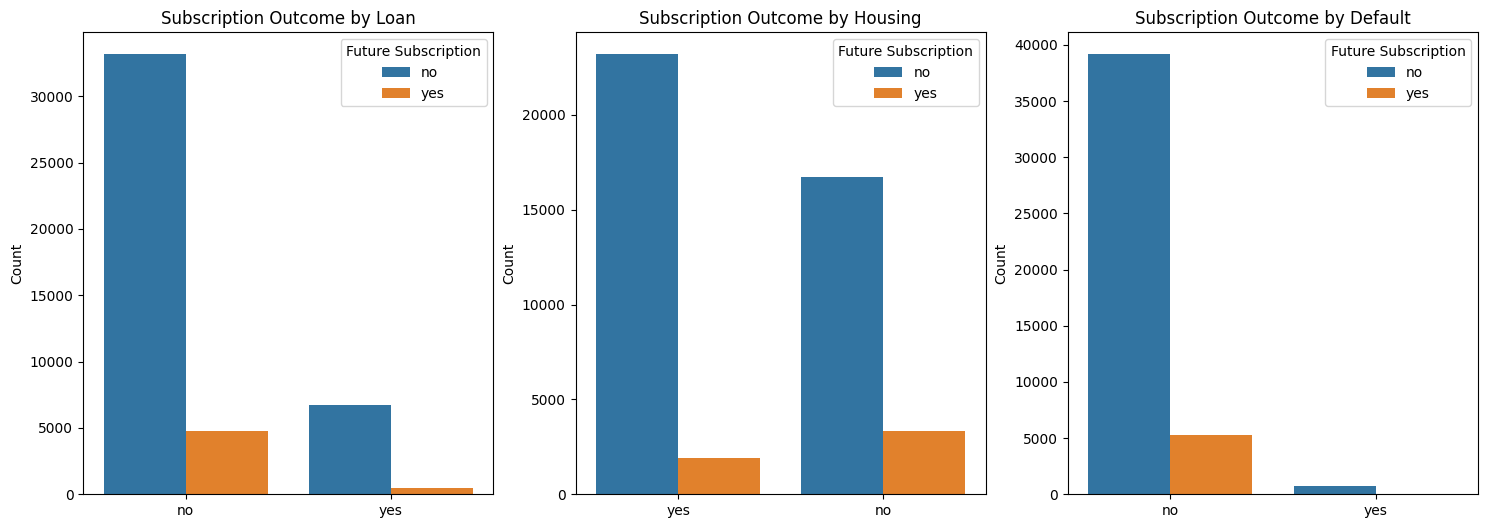

In [212]:
# Multiple countplots for loan, housing, and defaults with subscription outcome
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.countplot(x='loan', hue='result', data=df, ax=axes[0])
axes[0].set_title('Subscription Outcome by Loan')

sns.countplot(x='housing', hue='result', data=df, ax=axes[1])
axes[1].set_title('Subscription Outcome by Housing')

sns.countplot(x='default', hue='result', data=df, ax=axes[2])
axes[2].set_title('Subscription Outcome by Default')

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.legend(title='Future Subscription', loc='upper right')

plt.show()